<a href="https://colab.research.google.com/github/5harad/API201-students/blob/main/lectures/lecture-15-code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 15: Confidence intervals

In [1]:
library(tidyverse)

theme_set(theme_bw())

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.7      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
set.seed(1)

In [3]:
my_sample <- rbernoulli(1500, .45)
head(my_sample)

[1] FALSE FALSE  TRUE  TRUE FALSE  TRUE

In [4]:
CI <- function(iter) {
  my_sample <- rbernoulli(1500, .45)
  est <- mean(my_sample)
  moe <- 2 * sqrt(est*(1-est)/1500)
  c(estimate = est, lwr = est - moe, upr = est + moe)
}

In [5]:
set.seed(16)

many_worlds <- map_dfr(1:1e4, CI)
head(many_worlds)

estimate,lwr,upr
<dbl>,<dbl>,<dbl>
0.4760000,0.4502099,0.5017901
0.4526667,0.4269627,0.4783706
0.4646667,0.4389113,0.4904220
0.4533333,0.4276262,0.4790405
0.4253333,0.3998030,0.4508637
0.4533333,0.4276262,0.4790405


In [6]:
many_worlds <- many_worlds %>%
  mutate(true_p_in_interval = (lwr <= 0.45 & 0.45 <= upr))
head(many_worlds)

estimate,lwr,upr,true_p_in_interval
<dbl>,<dbl>,<dbl>,<lgl>
0.4760000,0.4502099,0.5017901,FALSE
0.4526667,0.4269627,0.4783706,TRUE
0.4646667,0.4389113,0.4904220,TRUE
0.4533333,0.4276262,0.4790405,TRUE
0.4253333,0.3998030,0.4508637,TRUE
0.4533333,0.4276262,0.4790405,TRUE


In [7]:
mean(many_worlds$true_p_in_interval)

[1] 0.9532

In [8]:
income <- 1000 * pmin(exp(rnorm(1e6, 3, 1)))
income <- ifelse(income <= 1e5, income, 0)

In [9]:
mean(income)
sd(income)

[1] 24099.77

[1] 21267.71

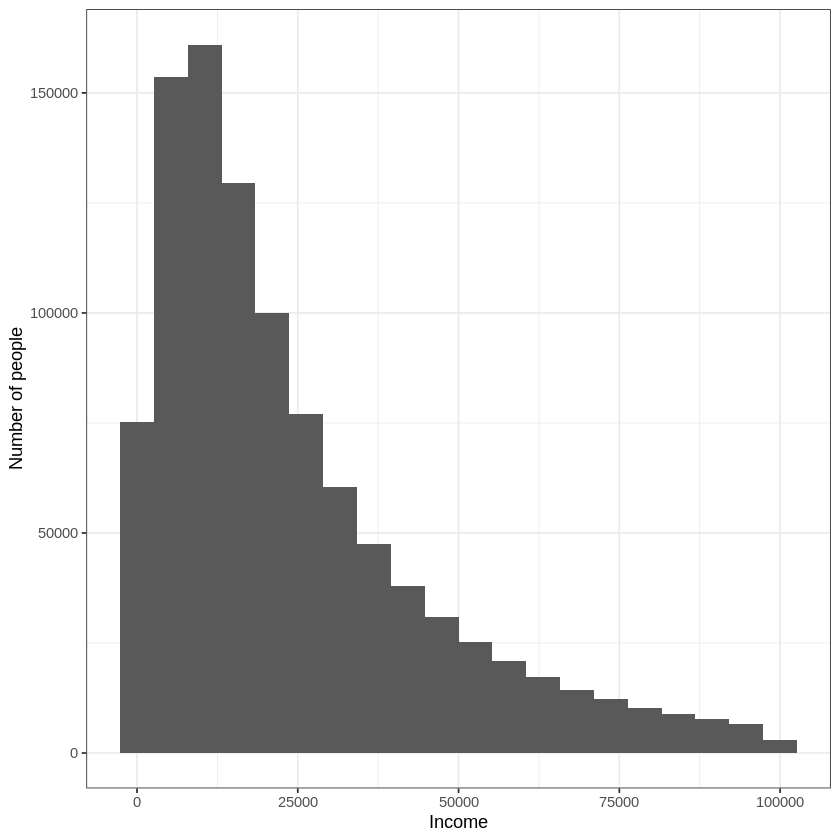

In [10]:
ggplot(data.frame(Income=income), aes(x=Income)) +
  geom_histogram(bins=20) +
  scale_y_continuous('Number of people')
ggsave('income.png', width=4, height=4)

In [11]:
many_worlds <- replicate(1e4, mean(sample(income, 500, replace = TRUE)))

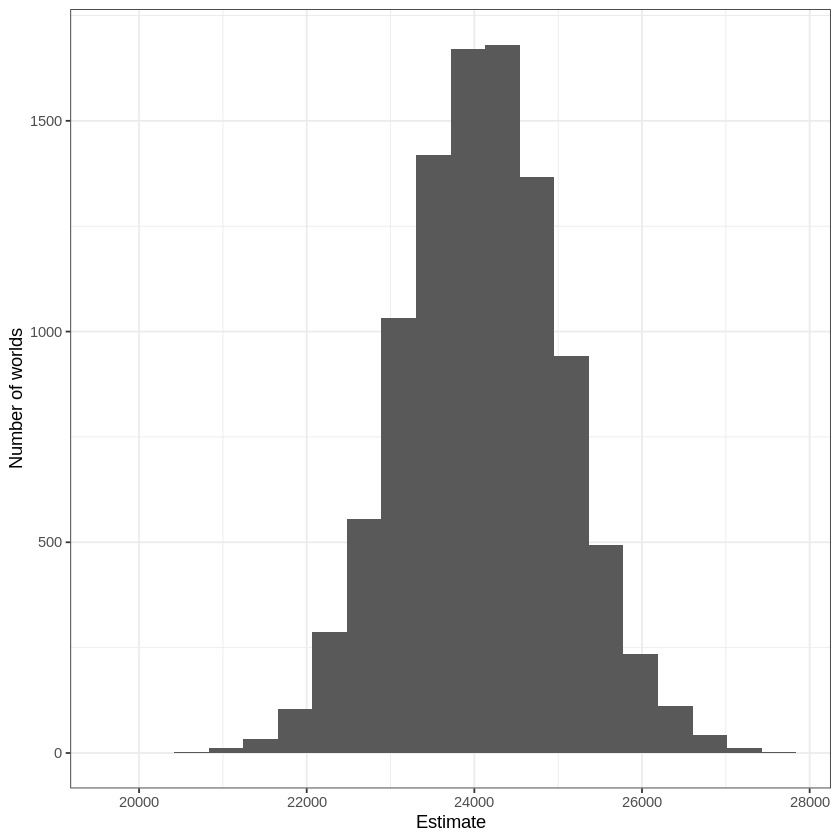

In [12]:
ggplot(data.frame(Estimate=many_worlds), aes(x=Estimate)) +
  geom_histogram(bins=20) +
  scale_y_continuous('Number of worlds')
ggsave('income-sample-mean.png', width=4, height=4)